### Importing and Getting Data

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading Data
-

In [59]:
customers = pd.read_csv("Ecom.csv")
customers.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


* Get Some statistical information related to data

In [60]:
customers.describe()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.00000,500.000000
mean,12.052620,37.060480,3.53336,499.314240
std,0.994418,1.010555,0.99926,79.314764
min,8.510000,33.910000,0.27000,256.670000
25%,11.390000,36.347500,2.93000,445.037500
50%,11.980000,37.070000,3.53500,498.890000
75%,12.752500,37.720000,4.13000,549.312500
max,15.130000,40.010000,6.92000,765.520000


In [61]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   	Email                500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


## Exploratory Data Analysis

Showing co relation between amount spend vs time spend on app/web

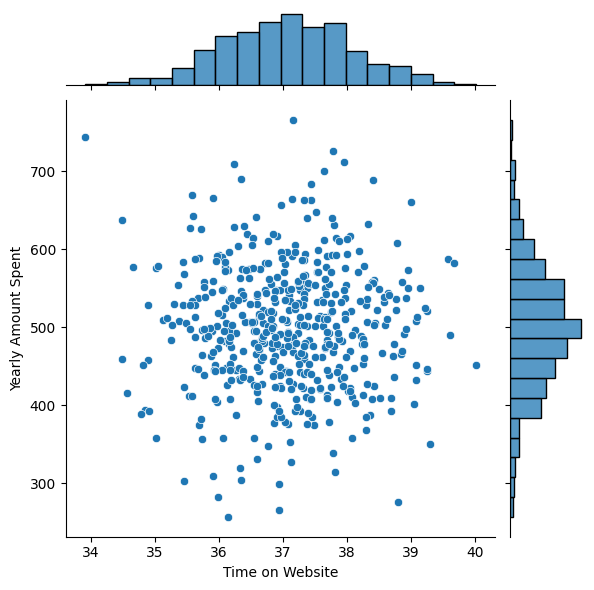

In [62]:
sns.jointplot(data = customers, x='Time on Website', y = 'Yearly Amount Spent')

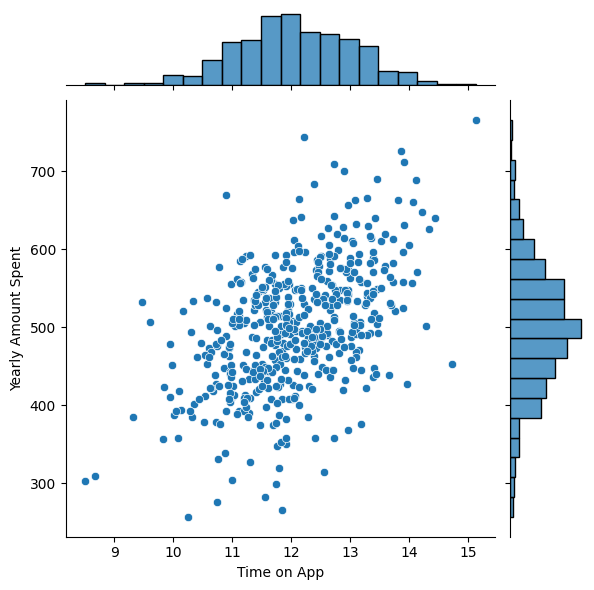

In [63]:
sns.jointplot(data = customers, x='Time on App', y = 'Yearly Amount Spent')

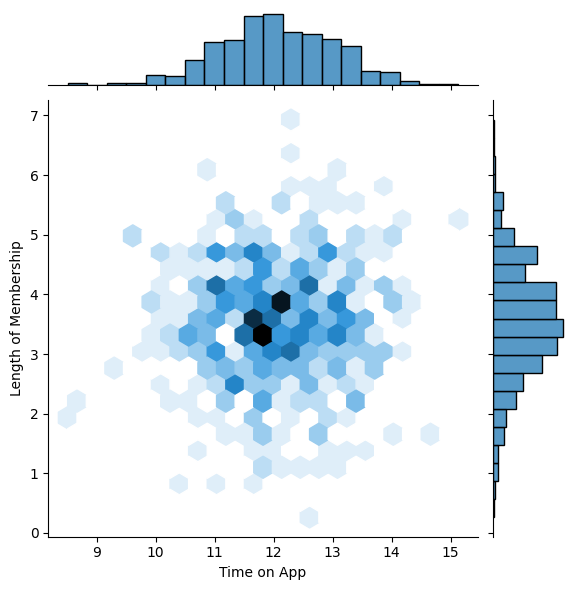

In [64]:
sns.jointplot(data = customers, x='Time on App', y = 'Length of Membership', kind = 'hex')

### Relation between different colums in dataset

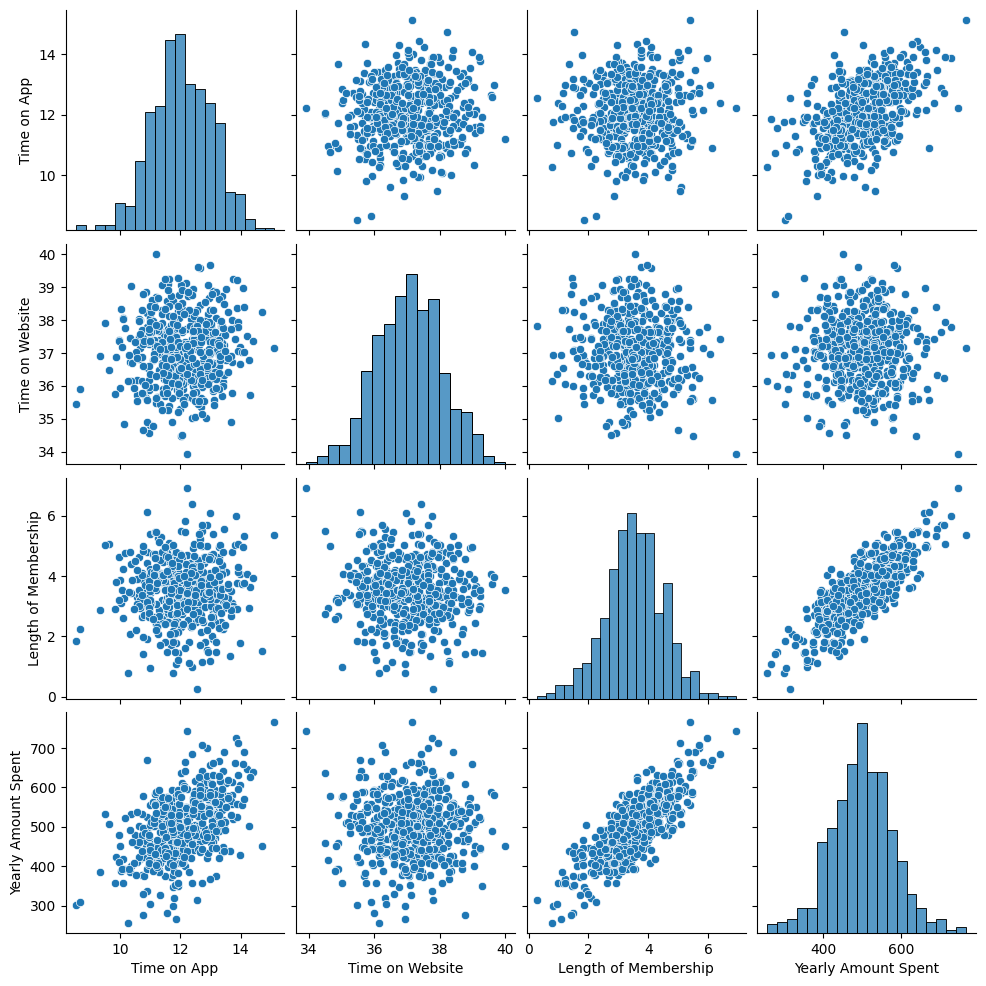

In [65]:
sns.pairplot(customers) #this will generate all data together quick way to plot all data

Based on plot we can say that `Yearly Amount Spent` is co related with `Time on Website`

### Now create linear model plot for them

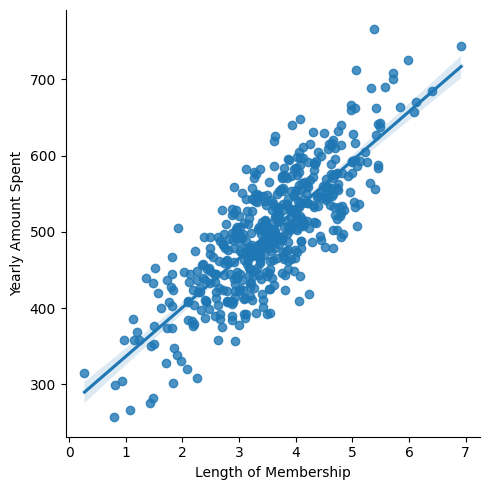

In [66]:
sns.lmplot(x='Length of Membership', y="Yearly Amount Spent", data = customers)

# Creating Training and Testing Data

In [67]:
customers.columns

Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [68]:
y = customers['Yearly Amount Spent']
X = customers[['Time on App', 'Time on Website', 'Length of Membership']]

Spliting data where test set 0.3, means 30% will be for testing and 70% will be for training

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Training The Model

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(X_train, y_train)

LinearRegression()

In [73]:
lm.coef_

array([37.35256275, -0.77932406, 62.73038728])

# Predicting Test Data

In [74]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Value')

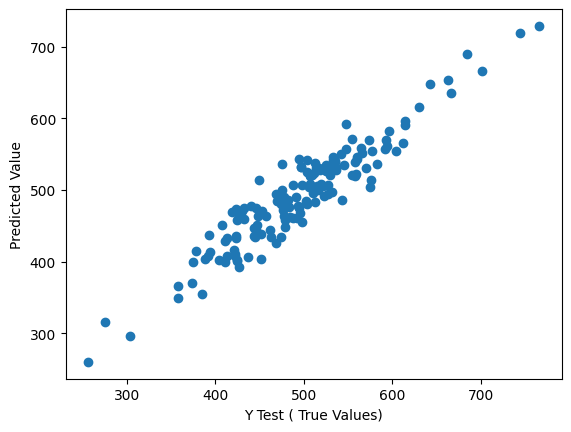

In [75]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test ( True Values)')
plt.ylabel('Predicted Value')

# Evaluating The Model

In [76]:
from sklearn import metrics

In [77]:
print(f"MAE : {metrics.mean_absolute_error(y_test, predictions)}")
print(f"MSE : {metrics.mean_squared_error(y_test, predictions)}")
print(f"RMSE : {np.sqrt(metrics.mean_squared_error(y_test, predictions))}")

MAE : 21.971853217364878
MSE : 712.985505967337
RMSE : 26.701788441363565


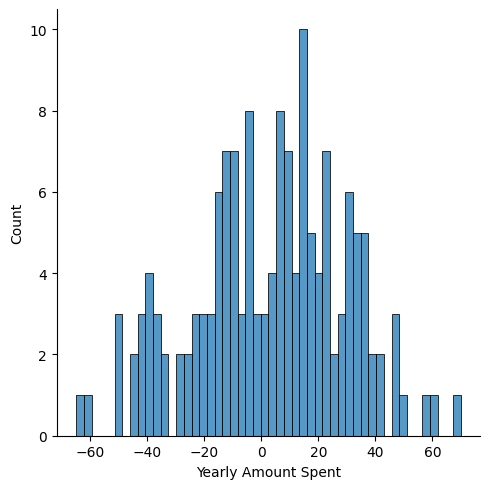

In [78]:
sns.displot((y_test-predictions), bins=50)

In [79]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
Time on App,37.352563
Time on Website,-0.779324
Length of Membership,62.730387


- Conclusion : as from data we can say that in increase of 1 in time on app there is $37 of increase and for website it is -0.77 and for membership it is 62.73. so they should focus on membership and time on appp.